In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [3]:
car_data = pd.read_csv("D:\Business\DMV\My Projects\Live Project\Car Price\car data.csv")

In [4]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.shape

(301, 9)

In [6]:
print(car_data['Seller_Type'].unique())

['Dealer' 'Individual']


In [7]:
#Looping the category variable length
cat=car_data[['Fuel_Type','Seller_Type','Transmission','Owner']]
for col in cat.columns:
    print(col, ':', len(cat[col].unique()),'labels')

Fuel_Type : 3 labels
Seller_Type : 2 labels
Transmission : 2 labels
Owner : 3 labels


In [8]:
#missing values
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
#Including a new feature - car age
new_car_data=car_data[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
new_car_data['Current_year']=2020
new_car_data['Car_age']=new_car_data['Current_year']-new_car_data['Year']

In [12]:
new_car_data[['Car_Name','Year','Car_age','Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']].head()

,Car_Name,Year,Car_age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
new_car_data.drop(['Car_Name','Year'], axis=1,inplace=True)

In [14]:
new_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [15]:
new_car_data=pd.get_dummies(new_car_data, drop_first=True)

In [16]:
new_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


In [17]:
new_car_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
Current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_age,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,NaN,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
#Plotting
#sns.pairplot(new_car_data)

In [19]:
correl=new_car_data.corr()
top_corr=correl.index

In [20]:
top_corr

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Current_year',
       'Car_age', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

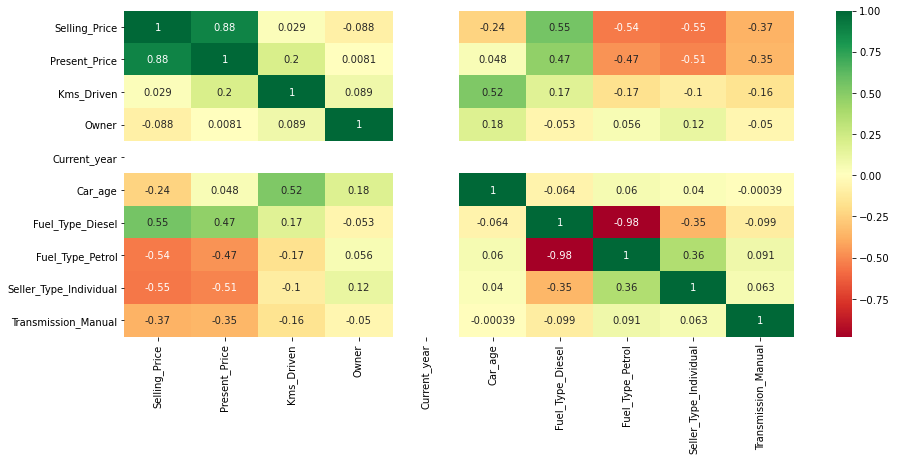

In [21]:
#heatmap
%matplotlib inline
plt.figure(figsize=(15,6))
sns.heatmap(new_car_data[top_corr].corr(),annot=True,cmap="RdYlGn")

In [22]:
new_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2020,6,0,1,0,1
1,4.75,9.54,43000,0,2020,7,1,0,0,1
2,7.25,9.85,6900,0,2020,3,0,1,0,1
3,2.85,4.15,5200,0,2020,9,0,1,0,1
4,4.60,6.87,42450,0,2020,6,1,0,0,1


In [23]:
#dependent & independent feature split
x=new_car_data.iloc[:,1:]
y=new_car_data.iloc[:,0]

In [24]:
#feature Importance
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.40490028 0.04076008 0.0017446  0.         0.07549935 0.20935584
 0.01271909 0.12778621 0.12723454]


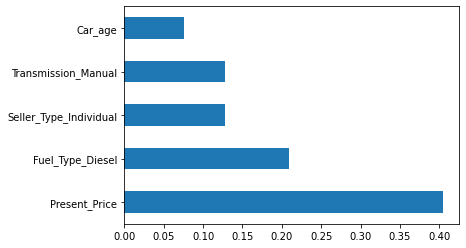

In [26]:
#Plotting the top 5 feature importance
FE=pd.Series(model.feature_importances_, index=x.columns)
FE.nlargest(5).plot(kind='barh')
plt.show()

In [27]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape

(240, 9)

In [29]:
y_train.shape

(240,)

In [30]:
x_test.shape

(61, 9)

In [31]:
y_test.shape

(61,)

In [32]:
# Model Creation

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
#Randomforst regressor uses Decision trees

In [34]:
#hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop =1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
#print(n_estimators)

In [35]:
random_grid={
    'n_estimators':n_estimators, 
    'max_features':max_features,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
from sklearn.model_selection import RandomizedSearchCV
rcv=RandomizedSearchCV(estimator=rf,param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
rcv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
##Predictions

In [39]:
predictions=rcv.predict(x_test)
predictions

array([ 7.61508,  3.96883, 19.91367,  6.72902,  7.03479,  0.59285,
        2.74795,  0.44775,  2.77735,  5.24329,  0.41436,  5.30651,
        0.32027,  8.81285,  4.2378 ,  6.78863, 18.13902,  5.24582,
        0.29492,  7.85686,  5.21397,  0.86454,  3.89597,  5.564  ,
        6.82238,  2.7487 ,  4.29075,  5.47605,  0.49816,  0.98815,
        6.76853,  0.81952, 19.91367,  0.58562,  4.42751,  4.2921 ,
        4.8117 ,  3.48765,  4.42445, 11.95646,  5.1447 ,  5.88123,
        3.4311 ,  9.01153,  9.57427,  0.73499,  3.4996 ,  5.98686,
        1.1156 ,  5.62827,  7.13424,  5.17328, 22.15586,  0.59726,
        0.45782,  3.21826,  0.62064,  2.45319,  0.8501 ,  9.85862,
        0.24504])

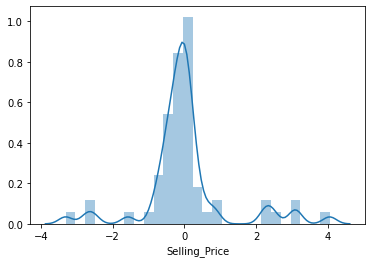

In [40]:
sns.distplot(y_test-predictions)

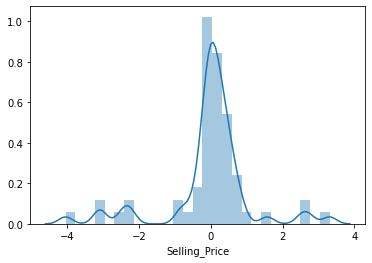

In [41]:
sns.distplot(predictions-y_test)

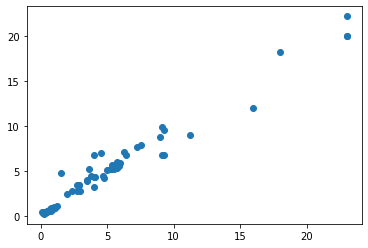

In [42]:
plt.scatter(y_test, predictions)

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6836377049180304
MSE: 1.4130896663934462
RMSE: 1.1887344810315912


In [45]:
#pickling the file

In [46]:
import pickle
file=open('rf_regression_model.pkl','wb')

#dumb information to that file
pickle.dump(rcv,file)
file.close()

In [47]:
print(file)

<_io.BufferedWriter name='rf_regression_model.pkl'>


In [48]:
#learing list comprehension
#letters = []
#for letter in 'madhan':
#    letters.append(letter)
#print(letters)
#print([letter for letter in 'madhan'])


In [49]:
import numpy as np
[int(x) for x in np.linspace(1, 5, num=5)]

[1, 2, 3, 4, 5]

In [50]:
np.linspace(6, 4, num=5)

array([6. , 5.5, 5. , 4.5, 4. ])

In [51]:
[i for i in range(2,5)]

[2, 3, 4]

In [52]:
a=[]
for i in range(2,5):
    a.append(i)
    print(i)

2
3
4


In [53]:
model = pickle.load(open('rf_regression_model.pkl', 'rb'))

In [54]:
model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)